# Matrix Plots in Seaborn

#-----> data visual equivalent of displaying a pivot table

#-----> displays all the data that is pass into it, i.e visualizing all the numeric values in the dataframe

#-----> NB - not all dataframes is valid choice for matrix plots like * heatmap

#### two types of matrix plots -
    
    - heatmap plot 
        
            - visually displays the distribution of cell values with a color mapping 
    
    - clustermap plot

            - exact same visual as heatmap, but first it conducts a clusteriing to group together very similar data rows or data columns & then we can see which gruoping is more similar before we actually visualize it with color   

            

### Heatmap

In [1]:
#eg --> heatmapping all continents v/s its birth rate, moratility rate, life expectancy etc

#------> this can be hard to tell what countries are similar to ech other v/s what regions are very different seeing the 
      # data table & how they compare to overall world average

#------> which why we can use heatmap to visualize this information thorh the use of color 

#------> & thus base on intensity of colors we can esily tell what region are similar to each other 
        # interm of birth rate v/s mortality rate etc

#NB :-
#-------> i.e hetmap should have all the cells be in the same unit, so that color mapping actually makes sense across entire dataframe 

#-------> eg- showing heatmaps for only the rate unit - birth rate, mortality rate, growth rate etc

#------> i.e if we include age, eg- life expectancy age ( number unit) which is completly different rate unit 
         # which is why it ll be totally different coloring column in heatmap 

        # & thus all the differences in rates in heatmap will be harder to distinguish because color mapping has spread very wide



#NB ---> i.e, this is the main reasaon why every datframe can be pass into a heatmap is that all cells should be of same unit 
       # eg - evrything to be of rate unit is correct for heatmapping 

#-------> *but, the minute we start add in different units like years V/S rates, then number is completely off from each other 
        #  thus reducing the effectiveness of this actual color mapping in heatmap plot 




### Clustering 

In [5]:
# clustering --

#-----> Seaborn come with ability to automatically cluster similar grouping together 

#-----> i.e group together similar rows or similar columns 

#-----> i.e what it does is it organize the columns & rows so that, eg - region like africa & europe or oceania & asia 
        # that are similar to ech other gets group together  depending on what we are actually loking at

        # * and the ** Hierarchical clustering is shown through the use of lines 

        # eg - we can see the birt rate & infant mortality rate are in similar grouping for africa etc 




#-----> we can learn how clustering is done mathematically in ML clustering technique ( refer internet for more)



In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns

In [10]:
df = pd.read_csv('country_table.csv')

df

,Countries,Birth rate,Mortality rate,Life expectancy,Infant mortality rate,Growth rate
0,AFRICA,32.577,7.837,63.472,44.215,24.40
1,ASIA,15.796,7.030,73.787,23.185,8.44
2,EUROPE,10.118,11.163,78.740,3.750,0.38
3,LATIN AMERICA AND THE CARIBBEAN,15.886,6.444,75.649,14.570,8.89
4,NORTHERN AMERICA,11.780,8.833,79.269,5.563,6.11
5,OCEANIA,16.235,6.788,78.880,16.939,12.79
6,WORLD,17.963,7.601,72.766,27.492,10.36


In [11]:
#labeled index -> we need to have labeled index, thus we can see numerical infos against two labels, eg- cuontries vs birth rate

df = df.set_index('Countries') #--> setiing Counties columns as label index
 

# NB- i.e, this is another reason why not every datframe is a good choice for heatmap   

In [13]:
df   

#--> we have labeled index , labeled column & then numerical row values (perfect for heatmap ) 

,Birth rate,Mortality rate,Life expectancy,Infant mortality rate,Growth rate
Countries,,,,,
AFRICA,32.577,7.837,63.472,44.215,24.40
ASIA,15.796,7.030,73.787,23.185,8.44
EUROPE,10.118,11.163,78.740,3.750,0.38
LATIN AMERICA AND THE CARIBBEAN,15.886,6.444,75.649,14.570,8.89
NORTHERN AMERICA,11.780,8.833,79.269,5.563,6.11
OCEANIA,16.235,6.788,78.880,16.939,12.79
WORLD,17.963,7.601,72.766,27.492,10.36


<Axes: ylabel='Countries'>

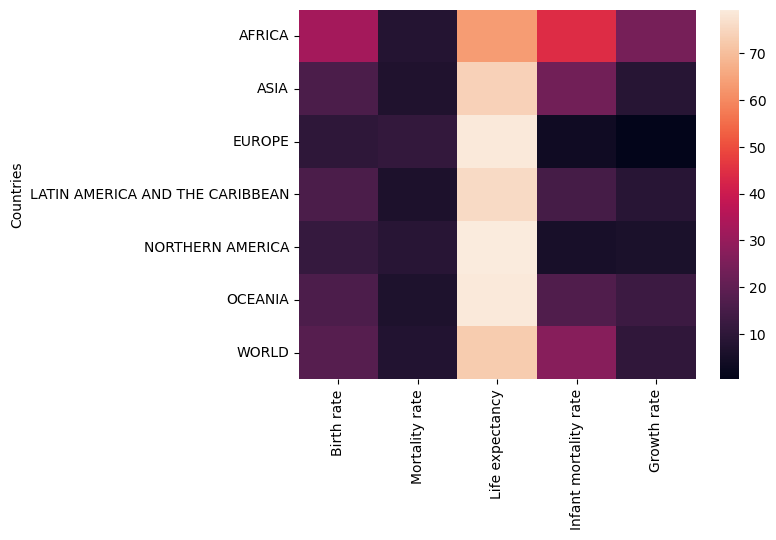

In [14]:

sns.heatmap(df)  # --> passing in entire dataframe, heatmap for entire dataframe
 


---> Nb, i.e - we can see one of the columns here (life expectancy heatmap plot) is entirely of different unit than other columns & color mapping is completely off here  
                     -i.e,  we cant read the heatmap correctly
                
    - all columns in df is of rate units, but life is unit of year & we can see scale is completely different
         
         eg- we have age 62 to 80 as life expectancy comapre to birth rate of 17 t0 32 range
         
### Nb - lowest value is darkest color & so on ..

-----


<Axes: ylabel='Countries'>

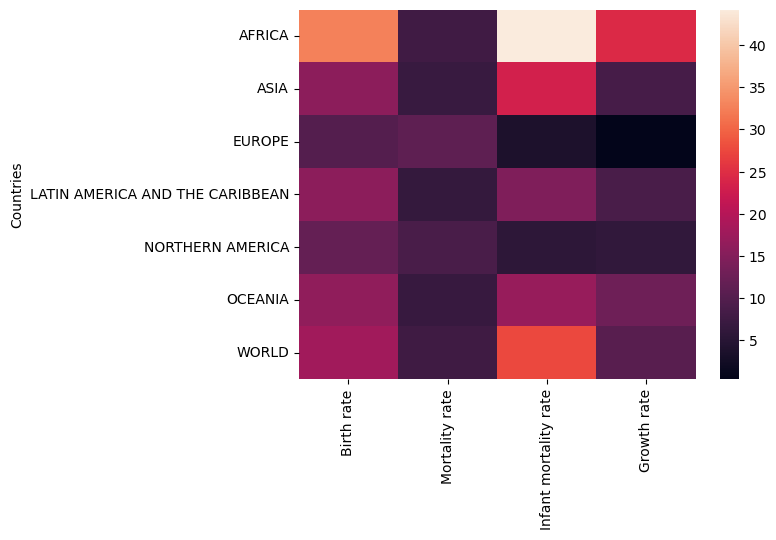

In [17]:
# dropping column that dont make sense for heatmap

sns.heatmap(df.drop('Life expectancy', axis=1))  # dropping Life expantancy from heatmap



 --> we can now clearly read the heatmap, eg - growth rate in africa is much higher than europe  etc
    
---> i.e dropping columns & making sure every columns in same unit aloows us to clearly read the heatmap 

<Axes: ylabel='Countries'>

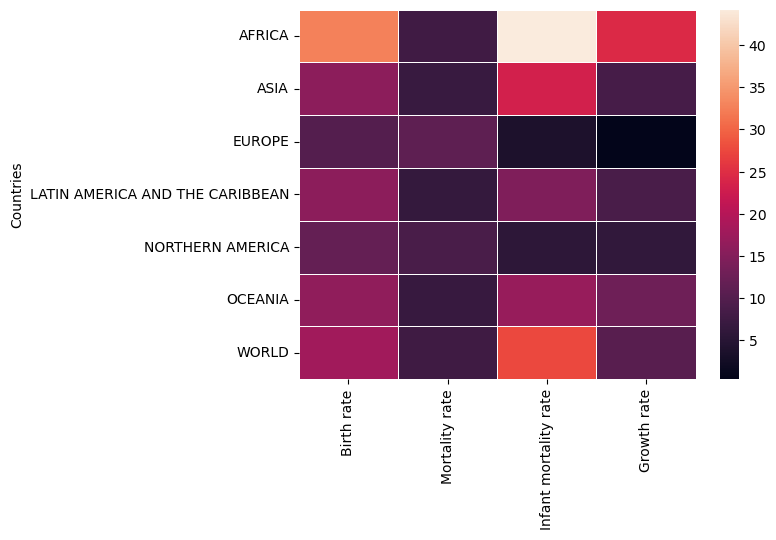

In [19]:
# linewidth param --> adds spacing between columns in heatmap

sns.heatmap(df.drop('Life expectancy', axis=1), linewidths=0.5) #--> pass in linewidth param, makes easier to read 

<Axes: ylabel='Countries'>

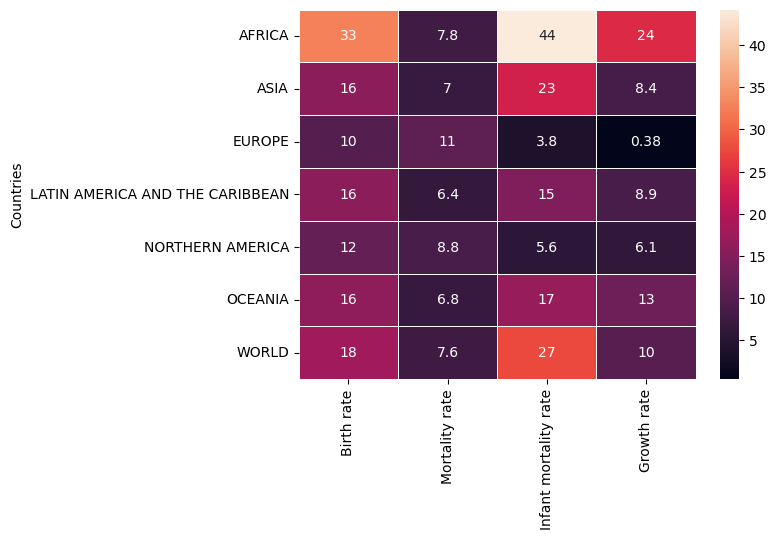

In [20]:
# annoted param --> also shows the values along with heatmaps 

sns.heatmap(df.drop('Life expectancy', axis=1), linewidths=0.5, annot=True) # pass in anot param as true


### NB--> always choose color mapping in heatmaps that can be read even by color blinded peaple


<Axes: ylabel='Countries'>

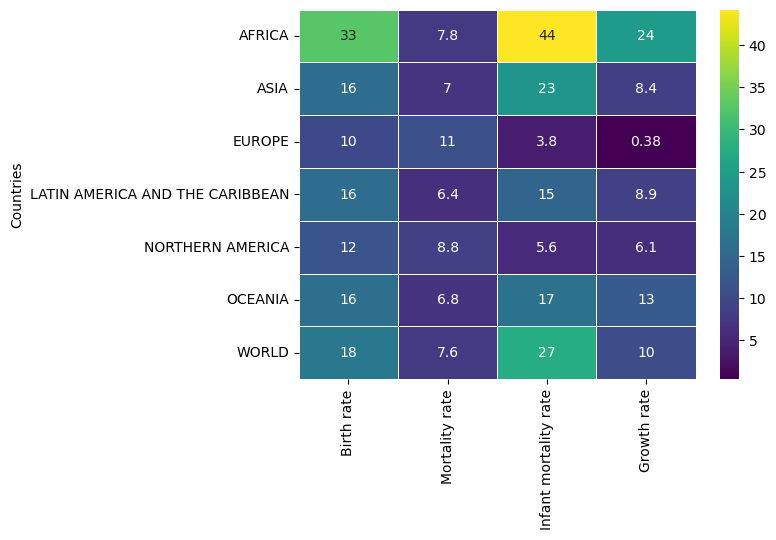

In [22]:
# cmap param ---> passing in color mapping for heatmap available in matplot

sns.heatmap(df.drop('Life expectancy', axis=1), linewidths=0.5, annot=True, cmap='viridis') # pass in cmap param as viridis color map


#NB- for color map in heatmap we pass cmap param & not the pallete param as we have in other plot types

<Axes: ylabel='Countries'>

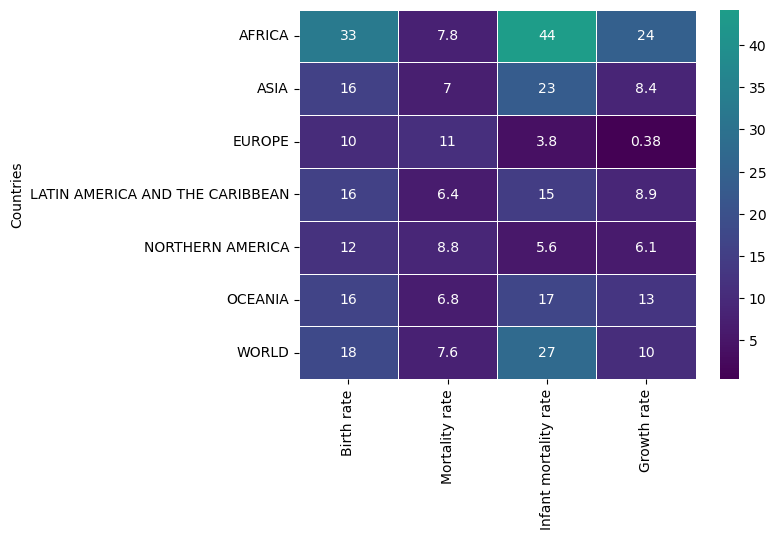

In [23]:
# Center param --> we can center the color to ehateever we want, it matches with color mapping 
                    # & centers the color map to whatever value we want

sns.heatmap(df.drop('Life expectancy', axis=1), linewidths=0.5, annot=True, cmap='viridis' , center=40)

      # --> pass in center param at value 40

---> what change is color map, eg - viridis which goes all way from dark purple to yellow i.e we want the center coloring to be at 40 

---> which means we must go much past 40 in either direction to get the Yellow color 

---> thus we can effect color mapping itelf to try to show for eg - these rates are more similar than we wnt to show 


###### NB - recommende that we dont edit the centering of the default color mapping schemes   

-----

### cluster map

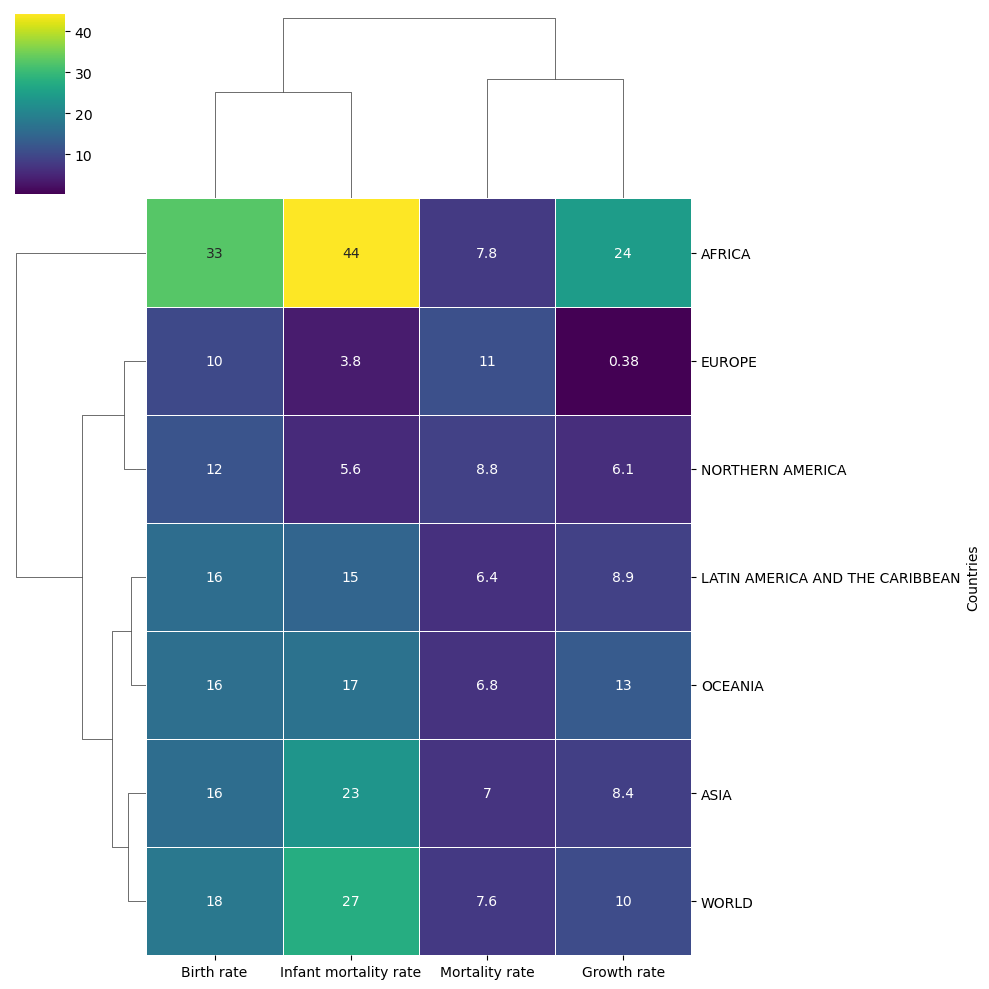

In [24]:
# cluster mapping plot ---> cluster together the gruopings of these both different columns 
                            # and label index based on similarity in a hierarchy
    
sns.clustermap(df.drop('Life expectancy', axis=1), linewidths=0.5, annot=True, cmap='viridis')  # --> creater cluster map

##### ---> we can see we group together both rates & country regions

#----> we can determine which rates are more or less similar to eg- Africa etc
     
     eg - we can see birt & infant motality rates are much higher so they are seperated to their own cluster V?S to lower rates martality & grwoth rate which hapens to be similar to all the countries, so it cluster them (columns) together
     
     
###### NB - i.e in certain situaton, it dont make sense to cluster the columns together , we dont have to cluster columns 
        
    


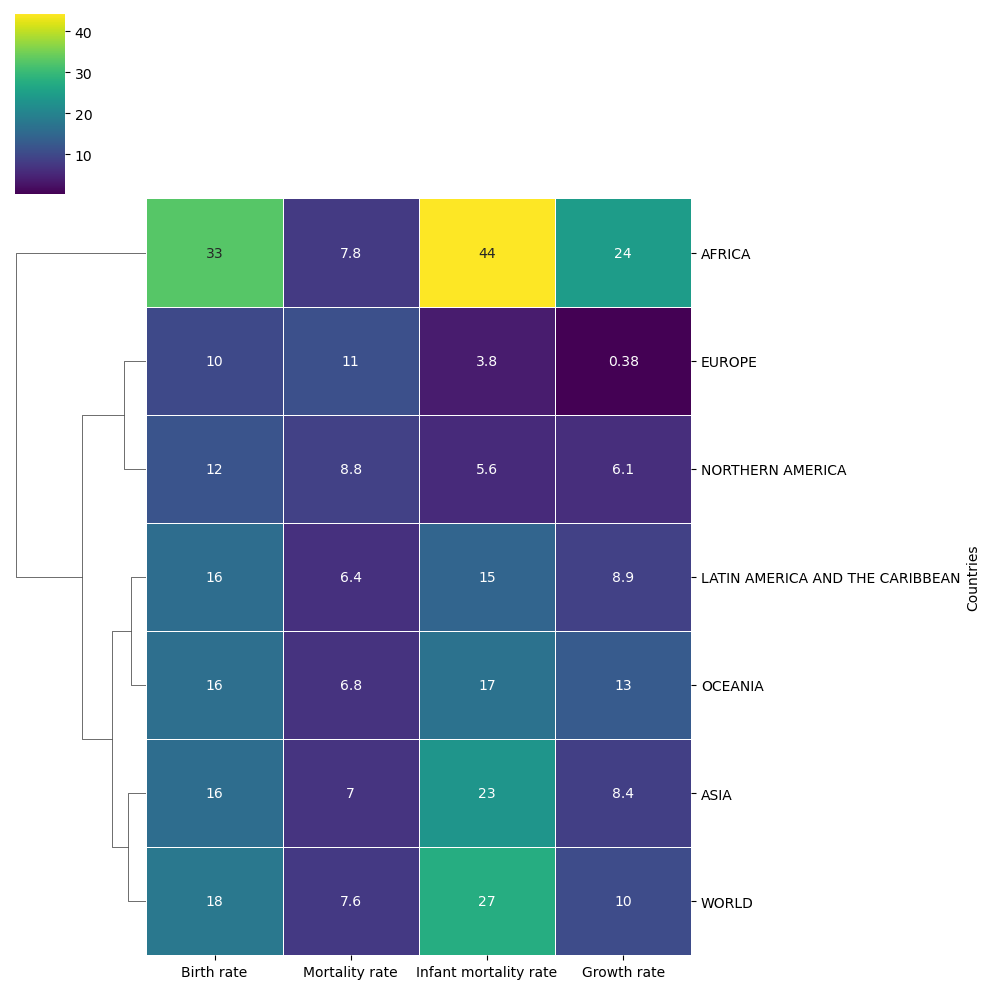

In [26]:
# column cluster param ----> we can only cluster the similar indexes & not rows

sns.clustermap(df.drop('Life expectancy', axis=1), linewidths=0.5, annot=True, cmap='viridis', col_cluster=False)

                           # pass in col cluster param as false

#---> we can see it only cluster the simllar indexes by cluster bar, eg- similar regions 

  eg - we can see europe & north america are similar to each other than to to the other groupings
    
    
    #---> & then we can see which groupings are then cluster together in higher & higher levels 


#---> we can also transpose this df incase we want to 



In [28]:
# --->  thats it for matrix plot :)